In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
transcript_df=pd.read_csv('/content/drive/MyDrive/INSY662/transcript.csv')
portfolio_df=pd.read_csv('/content/drive/MyDrive/INSY662/portfolio.csv')
profile_df=pd.read_csv('/content/drive/MyDrive/INSY662/profile.csv')

In [3]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [4]:
pd.crosstab(index = transcript_df['event'], columns = 'counts')
# More transactions than offer completed

col_0,counts
event,
offer completed,33579
offer received,76277
offer viewed,57725
transaction,138953


In [5]:
display(pd.crosstab(index = transcript_df['value'], columns = 'counts'))
amount=[]
for val in transcript_df['value']:
  if 'amount' in eval(val):
    amount.append(eval(val)['amount'])

amount=pd.Series(amount)
amount.describe()


col_0,counts
value,
{'amount': 0.05},431
{'amount': 0.06},109
{'amount': 0.07},89
{'amount': 0.08},100
{'amount': 0.09},87
...,...
"{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0', 'reward': 10}",3331
"{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",4354
"{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd', 'reward': 10}",3688


count    138953.000000
mean         12.777356
std          30.250529
min           0.050000
25%           2.780000
50%           8.890000
75%          18.070000
max        1062.280000
dtype: float64

In [6]:
transcript_df['time'].describe()

count    306534.000000
mean        366.382940
std         200.326314
min           0.000000
25%         186.000000
50%         408.000000
75%         528.000000
max         714.000000
Name: time, dtype: float64

In [7]:
print(transcript_df[transcript_df.duplicated()].shape)
# no duplicates
print(transcript_df.isnull().sum())
# no missing values

(0, 5)
Unnamed: 0    0
person        0
event         0
value         0
time          0
dtype: int64


<Axes: xlabel='event', ylabel='count'>

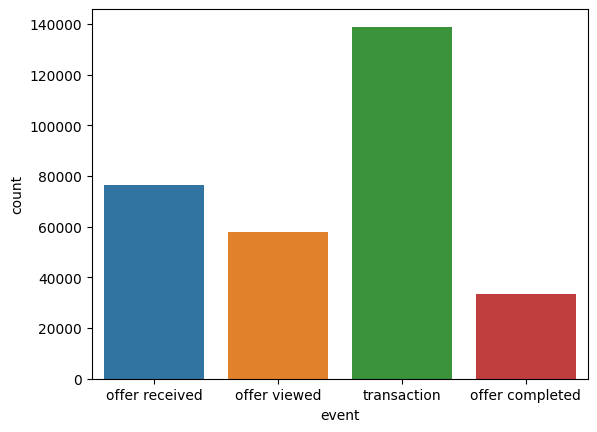

In [8]:
sns.countplot(x="event", data=transcript_df)

<Axes: xlabel='time', ylabel='Count'>

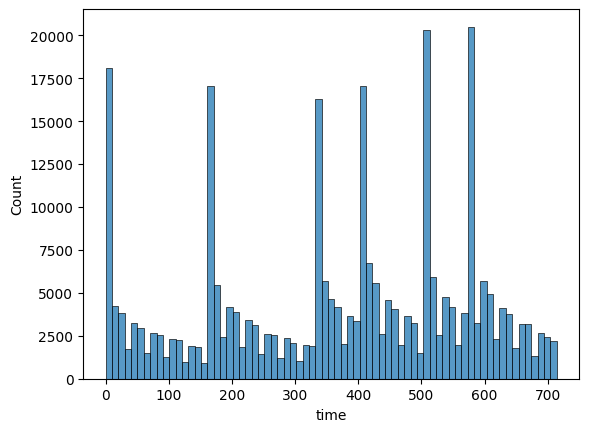

In [9]:
sns.histplot(x='time', data=transcript_df)

<Axes: >

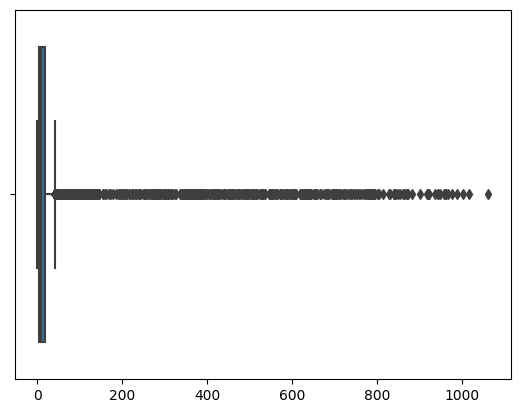

In [10]:
# Check outliers using boxplot
sns.boxplot(x=amount)

In [11]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [12]:
for column in portfolio_df.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=portfolio_df[column], columns="count"))

col_0,count
channels,
"['email', 'mobile', 'social']",2
"['web', 'email', 'mobile', 'social']",4
"['web', 'email', 'mobile']",3
"['web', 'email']",1


col_0,count
offer_type,
bogo,4
discount,4
informational,2


col_0,count
id,
0b1e1539f2cc45b7b9fa7c272da2e1d7,1
2298d6c36e964ae4a3e7e9706d1fb8c2,1
2906b810c7d4411798c6938adc9daaa5,1
3f207df678b143eea3cee63160fa8bed,1
4d5c57ea9a6940dd891ad53e9dbe8da0,1
5a8bc65990b245e5a138643cd4eb9837,1
9b98b8c7a33c4b65b9aebfe6a799e6d9,1
ae264e3637204a6fb9bb56bc8210ddfd,1
f19421c1d4aa40978ebb69ca19b0e20d,1


<Axes: xlabel='difficulty', ylabel='reward'>

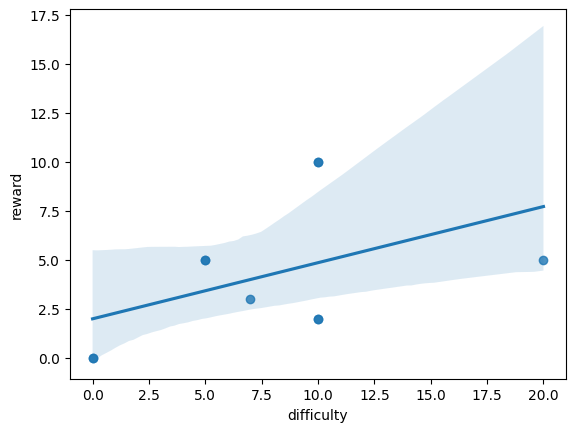

In [13]:
sns.regplot(x='difficulty', y='reward',data=portfolio_df)

In [14]:
portfolio_df.describe()

,Unnamed: 0,reward,difficulty,duration
count,10.00000,10.000000,10.000000,10.000000
mean,4.50000,4.200000,7.700000,6.500000
std,3.02765,3.583915,5.831905,2.321398
min,0.00000,0.000000,0.000000,3.000000
25%,2.25000,2.000000,5.000000,5.000000
50%,4.50000,4.000000,8.500000,7.000000
75%,6.75000,5.000000,10.000000,7.000000
max,9.00000,10.000000,20.000000,10.000000


In [15]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [16]:
profile_df.isnull().sum()

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

<Axes: xlabel='age', ylabel='gender'>

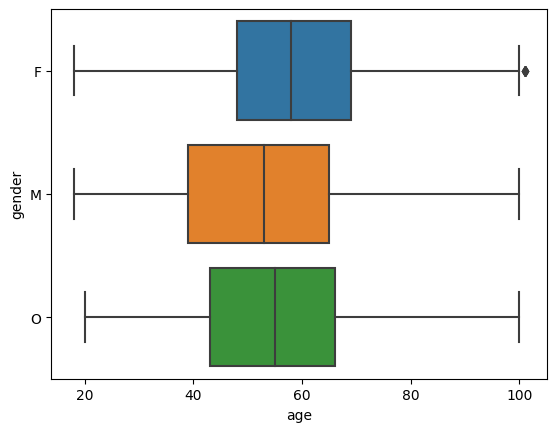

In [17]:
sns.boxplot(x='age', y='gender',data=profile_df)

In [18]:
profile_df[profile_df['age']==118].isnull().sum()
# observations with age = 118 miss gender and income as well
# drop missing values
profile_df = profile_df.dropna()
profile_df.isnull().sum()

Unnamed: 0          0
gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

In [19]:
#################Customer Segmentation#######################
amount=[]
# Extract transaction amount
for val in transcript_df['value']:
  if 'amount' in eval(val):
    amount.append(eval(val)['amount'])
  else:
    amount.append(0)
transcript_df['amount']=amount

In [20]:
# Column of total transaction amounts
temp = transcript_df.groupby(by='person')['amount'].sum().reset_index()
# Column of number of transactions
temp2 = transcript_df[transcript_df['amount'] != 0].groupby(by='person')['amount'].count().reset_index()
temp2.columns=['person', 'num_transactions']
# Column of number of offers received
temp3 = transcript_df[transcript_df['event'] == 'offer received'].groupby(by='person')['event'].count().reset_index()
temp3.columns=['person', 'num_received']
# Column of number of offers viewed
temp4 = transcript_df[transcript_df['event'] == 'offer viewed'].groupby(by='person')['event'].count().reset_index()
temp4.columns=['person', 'num_viewed']
# Column of number of offers completed
temp5 = transcript_df[transcript_df['event'] == 'offer completed'].groupby(by='person')['event'].count().reset_index()
temp5.columns=['person', 'num_completed']

# Merge transaction amount, number of transactions, number of offers received, viewed and completed to the profile dataframe
profile_df = profile_df.merge(temp, left_on='id', right_on='person', how='inner')
profile_df = profile_df.merge(temp2, left_on='id', right_on='person', how='inner')
profile_df = profile_df.merge(temp3, left_on='id', right_on='person', how='inner')
profile_df = profile_df.merge(temp4, left_on='id', right_on='person', how='inner')
profile_df = profile_df.merge(temp5, left_on='id', right_on='person', how='inner')
profile_df = profile_df.drop(columns=['person_x', 'person_y','person', 'person_x', 'person_y'])

# Add a column of average transaction
profile_df['avg_amount']=profile_df['amount']/profile_df['num_transactions']
# Add a column of view rate
profile_df['view_rate']=profile_df['num_viewed']/profile_df['num_received']
# Add a column of completion rate
profile_df['completion_rate']=profile_df['num_completed']/profile_df['num_viewed']

<ipython-input-20-254360994989>:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'person_x'} in the result is deprecated and will raise a MergeError in a future version.
  profile_df = profile_df.merge(temp4, left_on='id', right_on='person', how='inner')


In [21]:
profile_df.describe()
# View rate and completion rate can't be greater than 1
# Max of completion rate = 5, need to process the data

# # Define a function to update 'num_viewed' based on 'num_completed'
# def correct(row):
#     if row['num_completed'] > row['num_viewed']:
#         return row['num_completed']
#     else:
#         return row['num_viewed']

# # Apply the function to update 'num_viewed'
# profile_df['num_viewed'] = profile_df.apply(correct, axis=1)
# # Update the column of completion rate
# profile_df['completion_rate']=profile_df['num_completed']/profile_df['num_viewed']
# profile_df.describe()

,Unnamed: 0,age,became_member_on,income,amount,num_transactions,num_received,num_viewed,num_completed,avg_amount,view_rate,completion_rate
count,11916.000000,11916.000000,1.191600e+04,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000
mean,8490.881588,55.224236,2.016551e+07,67800.939913,139.962030,9.246559,4.545065,3.518966,2.713578,17.232161,0.779898,0.841367
std,4898.242488,17.035316,1.177940e+04,21728.662494,133.506299,5.118959,1.040062,1.230222,1.300810,16.306423,0.217399,0.480794
min,3.000000,18.000000,2.013073e+07,30000.000000,5.280000,1.000000,1.000000,1.000000,1.000000,1.311667,0.166667,0.166667
25%,4274.750000,44.000000,2.016033e+07,52000.000000,57.577500,5.000000,4.000000,3.000000,2.000000,8.443582,0.600000,0.500000
50%,8481.500000,56.000000,2.017041e+07,67000.000000,112.795000,8.000000,5.000000,4.000000,3.000000,16.357179,0.800000,0.750000
75%,12702.500000,67.000000,2.017112e+07,83000.000000,179.847500,12.000000,5.000000,4.000000,4.000000,22.573409,1.000000,1.000000
max,16999.000000,101.000000,2.018073e+07,120000.000000,1608.690000,36.000000,6.000000,6.000000,6.000000,301.310000,1.000000,5.000000


In [22]:
# Use the data preprocessed in another file
df_final=pd.read_csv('/content/drive/MyDrive/INSY662/data_final.csv')
# Column of number of offers completed
temp6 = df_final.groupby(by='person')['success'].sum().reset_index()
temp6.columns=['person', 'num_completed']

# Drop the original columns of num_completed, completion_rate
profile_df = profile_df.drop(columns=['num_completed', 'completion_rate'])
# Add new num_completed
profile_df = profile_df.merge(temp6, left_on='id', right_on='person', how='inner')
profile_df = profile_df.drop(columns=['person'])
# Add a column of new completion rate
profile_df['completion_rate']=profile_df['num_completed']/profile_df['num_viewed']
profile_df.describe()

,Unnamed: 0,age,became_member_on,income,amount,num_transactions,num_received,num_viewed,avg_amount,view_rate,num_completed,completion_rate
count,11916.000000,11916.000000,1.191600e+04,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000,11916.000000
mean,8490.881588,55.224236,2.016551e+07,67800.939913,139.962030,9.246559,4.545065,3.518966,17.232161,0.779898,1.904918,0.545983
std,4898.242488,17.035316,1.177940e+04,21728.662494,133.506299,5.118959,1.040062,1.230222,16.306423,0.217399,1.167157,0.290718
min,3.000000,18.000000,2.013073e+07,30000.000000,5.280000,1.000000,1.000000,1.000000,1.311667,0.166667,0.000000,0.000000
25%,4274.750000,44.000000,2.016033e+07,52000.000000,57.577500,5.000000,4.000000,3.000000,8.443582,0.600000,1.000000,0.333333
50%,8481.500000,56.000000,2.017041e+07,67000.000000,112.795000,8.000000,5.000000,4.000000,16.357179,0.800000,2.000000,0.500000
75%,12702.500000,67.000000,2.017112e+07,83000.000000,179.847500,12.000000,5.000000,4.000000,22.573409,1.000000,3.000000,0.750000
max,16999.000000,101.000000,2.018073e+07,120000.000000,1608.690000,36.000000,6.000000,6.000000,301.310000,1.000000,6.000000,2.000000


In [23]:
profile_df[profile_df['completion_rate'] >1].shape

(17, 14)

Max of completion rate is 2. Some offers are completed, but not viewed. Only 17 observations have completion rate greater than 1. We can drop these observations

In [24]:
profile_df.drop(profile_df[profile_df['completion_rate'] >1].index, inplace=True)
profile_df.describe()

,Unnamed: 0,age,became_member_on,income,amount,num_transactions,num_received,num_viewed,avg_amount,view_rate,num_completed,completion_rate
count,11899.000000,11899.000000,1.189900e+04,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000
mean,8489.244726,55.218842,2.016551e+07,67787.797294,139.867896,9.247920,4.544836,3.520044,17.217498,0.780180,1.902261,0.544718
std,4897.022501,17.036690,1.177800e+04,21724.371716,133.395667,5.120506,1.040321,1.230256,16.292413,0.217337,1.165327,0.288866
min,3.000000,18.000000,2.013073e+07,30000.000000,5.280000,1.000000,1.000000,1.000000,1.311667,0.166667,0.000000,0.000000
25%,4273.500000,44.000000,2.016033e+07,52000.000000,57.490000,5.000000,4.000000,3.000000,8.440942,0.600000,1.000000,0.333333
50%,8481.000000,56.000000,2.017041e+07,67000.000000,112.590000,8.000000,5.000000,4.000000,16.353000,0.800000,2.000000,0.500000
75%,12700.500000,67.000000,2.017112e+07,83000.000000,179.795000,12.000000,5.000000,4.000000,22.556667,1.000000,3.000000,0.750000
max,16999.000000,101.000000,2.018073e+07,120000.000000,1608.690000,36.000000,6.000000,6.000000,301.310000,1.000000,6.000000,1.000000


In [25]:
# Add a column of offer sensitivity = number of offers completed/number of transactions
profile_df['offer_sensitivity']=profile_df['num_completed']/profile_df['num_transactions']
profile_df.describe()

,Unnamed: 0,age,became_member_on,income,amount,num_transactions,num_received,num_viewed,avg_amount,view_rate,num_completed,completion_rate,offer_sensitivity
count,11899.000000,11899.000000,1.189900e+04,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000
mean,8489.244726,55.218842,2.016551e+07,67787.797294,139.867896,9.247920,4.544836,3.520044,17.217498,0.780180,1.902261,0.544718,0.261279
std,4897.022501,17.036690,1.177800e+04,21724.371716,133.395667,5.120506,1.040321,1.230256,16.292413,0.217337,1.165327,0.288866,0.224645
min,3.000000,18.000000,2.013073e+07,30000.000000,5.280000,1.000000,1.000000,1.000000,1.311667,0.166667,0.000000,0.000000,0.000000
25%,4273.500000,44.000000,2.016033e+07,52000.000000,57.490000,5.000000,4.000000,3.000000,8.440942,0.600000,1.000000,0.333333,0.125000
50%,8481.000000,56.000000,2.017041e+07,67000.000000,112.590000,8.000000,5.000000,4.000000,16.353000,0.800000,2.000000,0.500000,0.200000
75%,12700.500000,67.000000,2.017112e+07,83000.000000,179.795000,12.000000,5.000000,4.000000,22.556667,1.000000,3.000000,0.750000,0.333333
max,16999.000000,101.000000,2.018073e+07,120000.000000,1608.690000,36.000000,6.000000,6.000000,301.310000,1.000000,6.000000,1.000000,3.000000


Some observations have offer sensitivity greater than 1, because they may use multiple offers at one transaction. We can update offer sensitivity of those observations to 1

In [26]:
# Update offer sensitivity
profile_df.loc[profile_df['offer_sensitivity'] > 1, 'offer_sensitivity'] = 1
profile_df.describe()

,Unnamed: 0,age,became_member_on,income,amount,num_transactions,num_received,num_viewed,avg_amount,view_rate,num_completed,completion_rate,offer_sensitivity
count,11899.000000,11899.000000,1.189900e+04,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000
mean,8489.244726,55.218842,2.016551e+07,67787.797294,139.867896,9.247920,4.544836,3.520044,17.217498,0.780180,1.902261,0.544718,0.257980
std,4897.022501,17.036690,1.177800e+04,21724.371716,133.395667,5.120506,1.040321,1.230256,16.292413,0.217337,1.165327,0.288866,0.206858
min,3.000000,18.000000,2.013073e+07,30000.000000,5.280000,1.000000,1.000000,1.000000,1.311667,0.166667,0.000000,0.000000,0.000000
25%,4273.500000,44.000000,2.016033e+07,52000.000000,57.490000,5.000000,4.000000,3.000000,8.440942,0.600000,1.000000,0.333333,0.125000
50%,8481.000000,56.000000,2.017041e+07,67000.000000,112.590000,8.000000,5.000000,4.000000,16.353000,0.800000,2.000000,0.500000,0.200000
75%,12700.500000,67.000000,2.017112e+07,83000.000000,179.795000,12.000000,5.000000,4.000000,22.556667,1.000000,3.000000,0.750000,0.333333
max,16999.000000,101.000000,2.018073e+07,120000.000000,1608.690000,36.000000,6.000000,6.000000,301.310000,1.000000,6.000000,1.000000,1.000000


In [27]:
from datetime import datetime
# Add a column of how long the person has becomed the member, define latest member as 0 day.
profile_df['became_member_on'] = profile_df['became_member_on'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
profile_df['member_days'] = (profile_df['became_member_on'].max()-profile_df['became_member_on']).apply(lambda x: x.days)
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income,amount,num_transactions,num_received,num_viewed,avg_amount,view_rate,num_completed,completion_rate,offer_sensitivity,member_days
0,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,159.27,7,4,4,22.752857,1.000000,2,0.500000,0.285714,443
1,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,57.73,3,4,3,19.243333,0.750000,2,0.666667,0.666667,91
2,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,36.43,3,6,6,12.143333,1.000000,5,0.833333,1.000000,167
3,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,15.62,4,3,2,3.905000,0.666667,1,0.500000,0.250000,257
4,13,F,61,aa4862eba776480b8bb9c68455b8c2e1,2017-09-11,57000.0,85.55,6,5,5,14.258333,1.000000,2,0.400000,0.333333,318


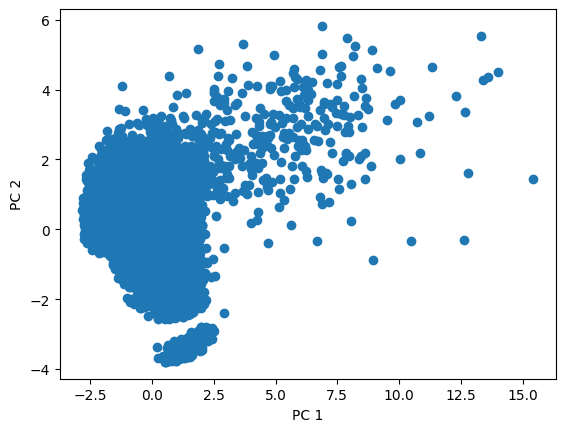

In [28]:
# Use 'amount', 'num_transactions', 'avg_amount', 'view_rate', 'completion_rate', 'offer sensitivity' for customer segmentation
var = profile_df[['amount', 'num_transactions', 'avg_amount', 'view_rate', 'completion_rate', 'offer_sensitivity']]

# Standardize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var_std = scaler.fit_transform(var)

# PCA to reduce the data to 2 dimensions for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
var_pca = pca.fit_transform(var_std)
var_pca = pd.DataFrame(var_pca, columns =['PC1', 'PC2'])

from matplotlib import pyplot
pyplot.scatter(var_pca['PC1'], var_pca['PC2'])
pyplot.xlabel("PC 1")
pyplot.ylabel("PC 2")
pyplot.show()

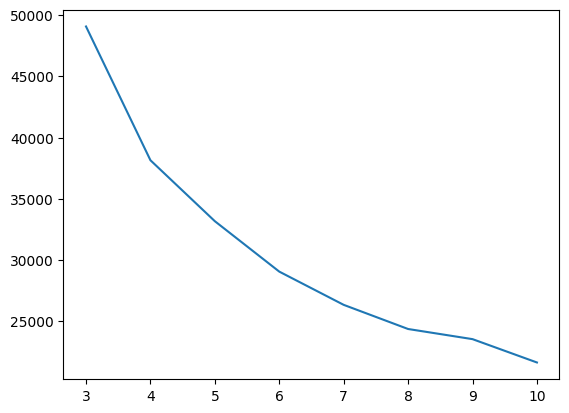

In [29]:
############# K-Means #############
from sklearn.cluster import KMeans

# Elbow method to determine K
withinss = []
for i in range (3,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    model = kmeans.fit(var_std)
    withinss.append(model.inertia_)

pyplot.plot([3,4,5,6,7,8,9,10],withinss) # probably k = 4 or 7?

In [30]:
# Silhouette method to determine K
from sklearn.metrics import silhouette_score
for i in range (3,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    model = kmeans.fit(var_std)
    labels = model.labels_
    print(i,':',silhouette_score(var_std,labels)) # k = 7

3 : 0.20558107618861235
4 : 0.21999982722178976
5 : 0.2247348308291272
6 : 0.2354209612147688
7 : 0.22541804673960425
8 : 0.2252181838024126
9 : 0.23671436892809702
10 : 0.2032561379274063


In [31]:
# Pseudo F score to determine K
from sklearn.metrics import calinski_harabasz_score
for i in range (3,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    model = kmeans.fit(var_std)
    labels = model.labels_
    score = calinski_harabasz_score(var_std, labels)
    print(i,'F-score:',score) # k = 4

3 F-score: 3209.1709861907716
4 F-score: 3455.432892404188
5 F-score: 2172.95532739582
6 F-score: 3275.917922232893
7 F-score: 3387.809232019037
8 F-score: 3270.26138164066
9 F-score: 3123.159770102312
10 F-score: 3040.4431184461487


In [32]:
# Final K-means, k=4
model = KMeans(n_clusters=4, n_init='auto')
cluster = model.fit_predict(var_std)
# Display the cluster center with the original values
display(pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns=var.columns))

,amount,num_transactions,avg_amount,view_rate,completion_rate,offer_sensitivity
0,185.484413,14.226641,14.376385,0.829360,0.649716,0.181231
1,108.299141,5.531215,19.908439,0.878122,0.652951,0.486999
2,827.463451,9.650442,102.329599,0.823378,0.654646,0.288606
3,80.182142,7.335654,12.804573,0.633342,0.324323,0.125054


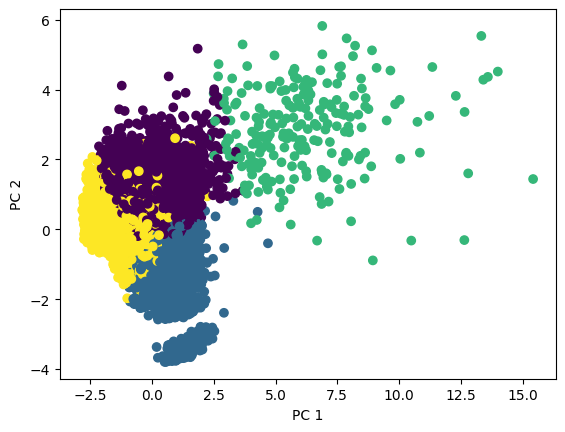

In [33]:
# Visualization of clusters reduced by PCA
pyplot.scatter(var_pca['PC1'], var_pca['PC2'], c=cluster)
pyplot.xlabel("PC 1")
pyplot.ylabel("PC 2")
pyplot.show()

<ipython-input-34-35072feddb5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var['cluster'] = cluster


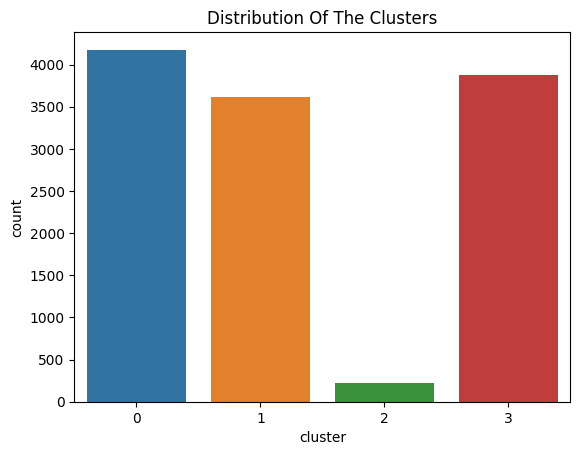

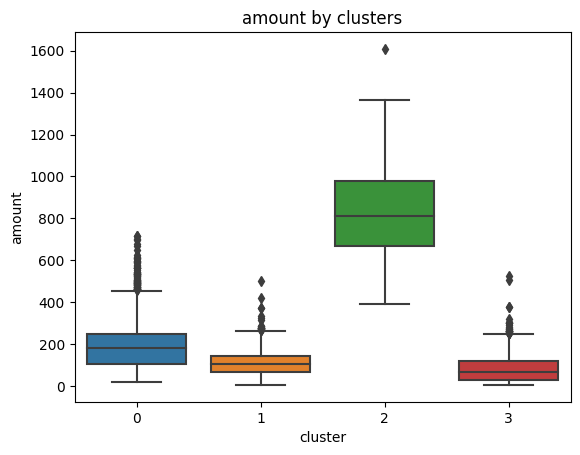

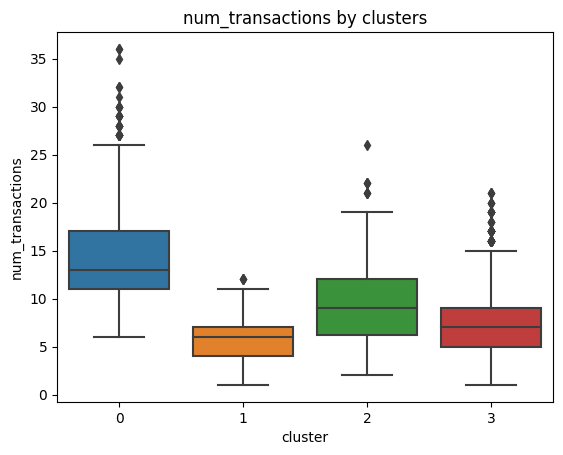

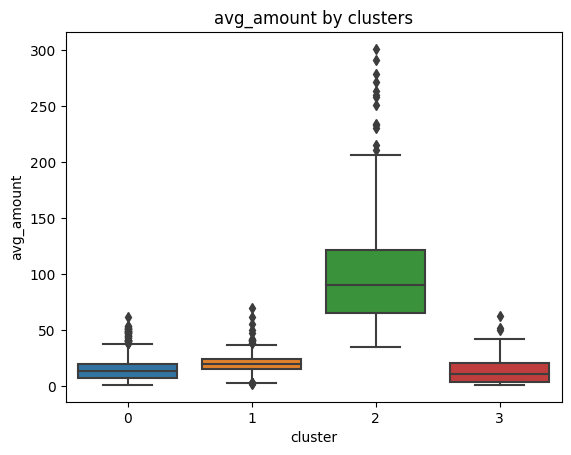

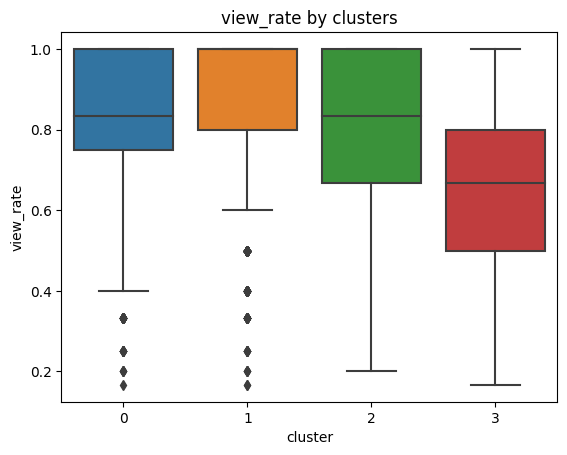

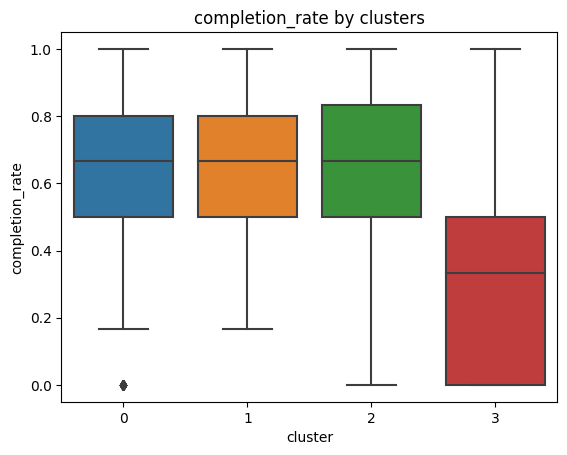

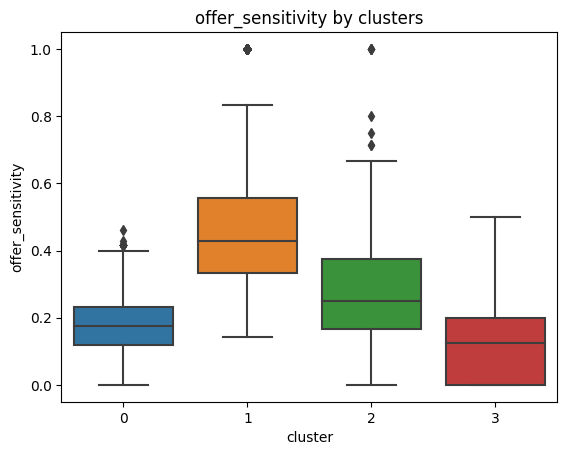

In [34]:
var['cluster'] = cluster
profile_df['cluster'] = cluster
############# Examining Clusters#############
# Distribution of the clusters
pl = sns.countplot(x=var["cluster"])
pl.set_title("Distribution Of The Clusters")
pyplot.show()

for i in var.columns[:-1]:
  pl = sns.boxplot(x="cluster", y=i, data=var)
  pl.set_title(i+" by clusters")
  pyplot.show()

Notation:

•	Offer Sensitivity: A measure of how a customer's purchasing behavior is influenced by marketing offers. High sensitivity means customers are more likely to make a purchase when presented with an offer.

•	Completion Rate: This rate reflects the proportion of offers that are viewed by the customer and then completed by making a qualifying purchase. A high completion rate indicates that customers are not just interested in offers but are also acting on them.

1.	Cluster 0 (Blue) - The Regulars

•	Total Amount Spent: Lower total spending, indicating smaller transaction sizes.

•	Average Amount Spent: Consistently lower on average per transaction, reinforcing the smaller purchase behavior.

•	Number of Transactions: High number of transactions, but lower spending might indicate frequent small purchases.

•	Completion Rate:Moderate, indicating a fair engagement with completed offers when viewed.

•	Offer Sensitivity: Lower, meaning that these customers are less likely to change their purchasing behavior based on promotions or offers.

•	View Rate: High rate of viewing offers, they often look at offers, indicating awareness and potential interest in promotions.

•	Cluster distribution: This is one of the large clusters, so that there is a significant portion of customers fit this profile

•	Persona: These are everyday shoppers who visit often but spend less per visit. They are consistent in viewing offers but are less influenced by them. They are aware of offers but may need more compelling incentives to significantly alter their spending habits.

2.	Cluster 1 (Orange) - The Considerate Shoppers

•	Total Amount Spent: Moderate, indicating these customers contribute a steady revenue stream.

•	Average Amount Spent: Moderate but slightly higher average spending than Cluster 0, suggesting these customers make thoughtful purchases of average value.

•	Number of Transactions: Lower, which could mean they shop less frequently but spend more when they do.

•	Completion Rate: Moderate(similar to cluster 0)

•	Offer Sensitivity: Moderate, these customers can be influenced by offers but are not the most responsive group.

•	View Rate: High, they are actively reviewing the offers, which may influence their purchasing decisions.

•	Cluster distribution : Also a large cluster, suggesting many customers belong to this moderate spending category.

•	Persona: They shop less frequently but make the most of their visits. Offers can influence their behavior, especially if aligned with their interests.

3.	Cluster 2 (Green) - The Premium Patrons

•	Total Amount Spent: Highest among all clusters, indicating significant spending.

•	Average Amount Spent: Also the highest, suggesting large per-transaction purchases.

•	Number of Transactions: Moderately high, they shop frequently and spend a lot when they do.

•	Completion Rate: High, showing they often take advantage of offers presented to them.

•	Offer Sensitivity: High, they respond well to offers, likely taking action when an offer aligns with their preferences.

•	View Rate: Moderate to high, indicating they are selective but attentive to offers.

•	Cluster distribution: The smallest cluster, indicating these are the premium cust6omers but in the least numbers

•	Persona: Premium customers who spend a lot and are very engaged with the offers, likely to complete them when viewed.these customers are the ideal target for premium offers and loyalty programs as they respond well to marketing initiatives.

4.	Cluster 3 (Red) - The Casual Buyers

•	Total Amount Spent: Lowest, indicating infrequent or minimal purchases.

•	Average Amount Spent: Lowest average spend, reinforcing their infrequent purchasing behavior.

•	Number of Transactions: Least frequent, suggesting they are not regular shoppers.

•	Completion Rate: Lowest, indicating a low engagement with completing offers.

•	Offer Sensitivity: Lowest, they are the least responsive to offers, implying that promotions have little impact on their purchasing behavior.

•	View Rate: Lowest, they are not actively looking at offers, which might contribute to their low completion rate.

•	Cluster Distribution: This cluster is comparable in size to Clusters 0 and 1, representing a significant segment of the customer base.

•	Persona: Infrequent and low-spending customers who are the least engaged with offers. They might be new customers, occasional visitors, or just less engaged with the platform overall.



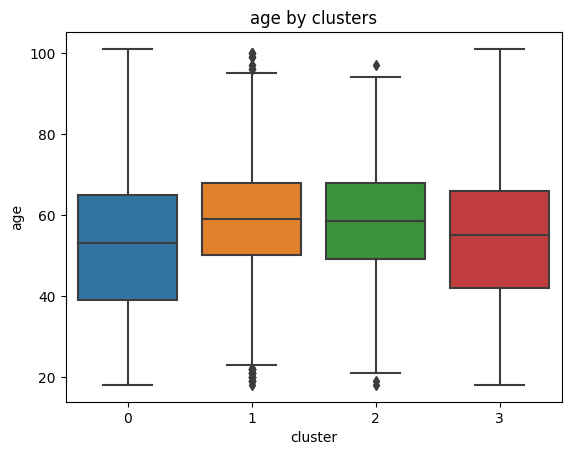

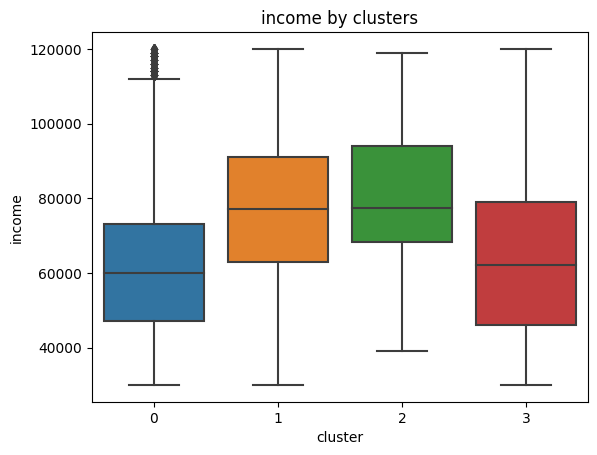

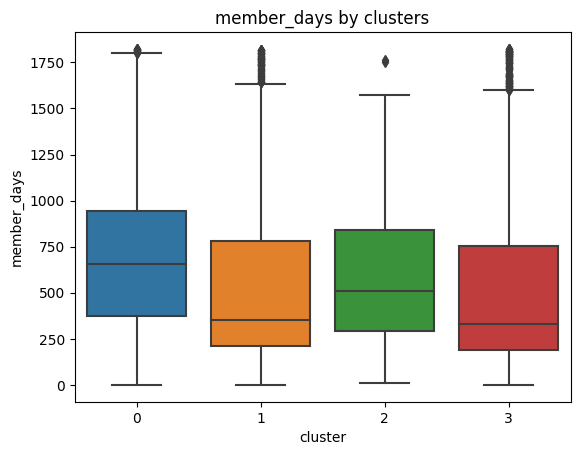

In [35]:
persona = profile_df[['gender', 'age', 'income', 'member_days', 'cluster']]
for i in persona.columns[1:-1]:
  pl = sns.boxplot(x="cluster", y=i, data=persona)
  pl.set_title(i+" by clusters")
  pyplot.show()

In [36]:
# Grouping by 'cluster' and aggregating statistics - get persona of each cluster
grouped = persona.groupby('cluster').agg({
    'gender': lambda x: x.mode()[0],  # Most frequent gender
    'age': 'mean',  # Average age
    'income': 'mean',  # Average income
    'member_days': 'mean'  # Average member_days
}).reset_index()

In [37]:
grouped['member_days'] = round(grouped['member_days'])
base_date = datetime(2018, 12, 31) #assumption

from datetime import timedelta
grouped['became_member_on'] = base_date - grouped['member_days'].apply(lambda x: timedelta(x))
grouped

,cluster,gender,age,income,member_days,became_member_on
0,0,M,52.558056,62099.832416,699.0,2017-01-31
1,1,F,59.416159,77030.437189,507.0,2017-08-11
2,2,F,58.190265,80238.938053,567.0,2017-06-12
3,3,M,54.001288,64578.567749,495.0,2017-08-23


In [38]:
# Get the gender distribution for each cluster
persona.groupby('cluster')['gender'].value_counts().unstack()

gender,F,M,O
cluster,,,
0,1829,2277,71
1,1835,1713,66
2,115,108,3
3,1560,2283,39


In [69]:
df_final = df_final.merge(profile_df[['id', 'cluster']], left_on='person', right_on='id', how='left')
df_final = df_final.drop(columns=['id'])
# Calculate success rate for 'type_bogo' and 'type_discount' for each cluster
success_rate_bogo = df_final[df_final['type__bogo']].groupby('cluster')['success'].mean().reset_index()
success_rate_discount = df_final[df_final['type__discount']].groupby('cluster')['success'].mean().reset_index()

In [70]:
print("Success rate for type_bogo=True for each cluster:")
df_final[df_final['type__bogo']].groupby('cluster')['success'].mean().reset_index()

Success rate for type_bogo=True for each cluster:


,cluster,success
0,0.0,0.653532
1,1.0,0.694175
2,2.0,0.728947
3,3.0,0.263755


In [71]:
print("Success rate for type_discount=True for each cluster:")
display(success_rate_discount)

Success rate for type_discount=True for each cluster:


,cluster,success
0,0.0,0.776843
1,1.0,0.736189
2,2.0,0.768392
3,3.0,0.363288


In [41]:
#####################Predictive analysis for customer segmentation####################
X = profile_df[['gender', 'age', 'income', 'member_days']]
y = profile_df['cluster']

# Dummify gender
X = pd.get_dummies(X, columns=['gender'], drop_first=True)

# Check multicollinearity (because we will use logistic regression)
# Create VIF dataframe
from statsmodels.tools.tools import add_constant
X1 = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

# Calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(X1.columns)):
    vif_data.loc[vif_data.index[i],"VIF"] = variance_inflation_factor(X1.values, i)

print(vif_data)
# No collinearity

       feature        VIF
0        const  22.118091
1          age   1.120708
2       income   1.144877
3  member_days   1.004964
4     gender_M   1.072905
5     gender_O   1.020374


In [42]:
# Standardize the variables
scaler2 = StandardScaler()
X_std = scaler2.fit_transform(X)

# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train_std,X_test_std,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=5)

In [43]:
### Model 1: Classification tree, for interpretation
# Hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':[3, 4, 5, 6],
              'min_samples_split': [3, 4, 5, 6],
              'min_samples_leaf':[3, 4, 5, 6]}
ct = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(ct, parameters, cv=5)

grid.fit(X_train_std,y_train)

print(grid.best_score_ )
print(grid.best_params_ )

0.4981412384773729
{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}


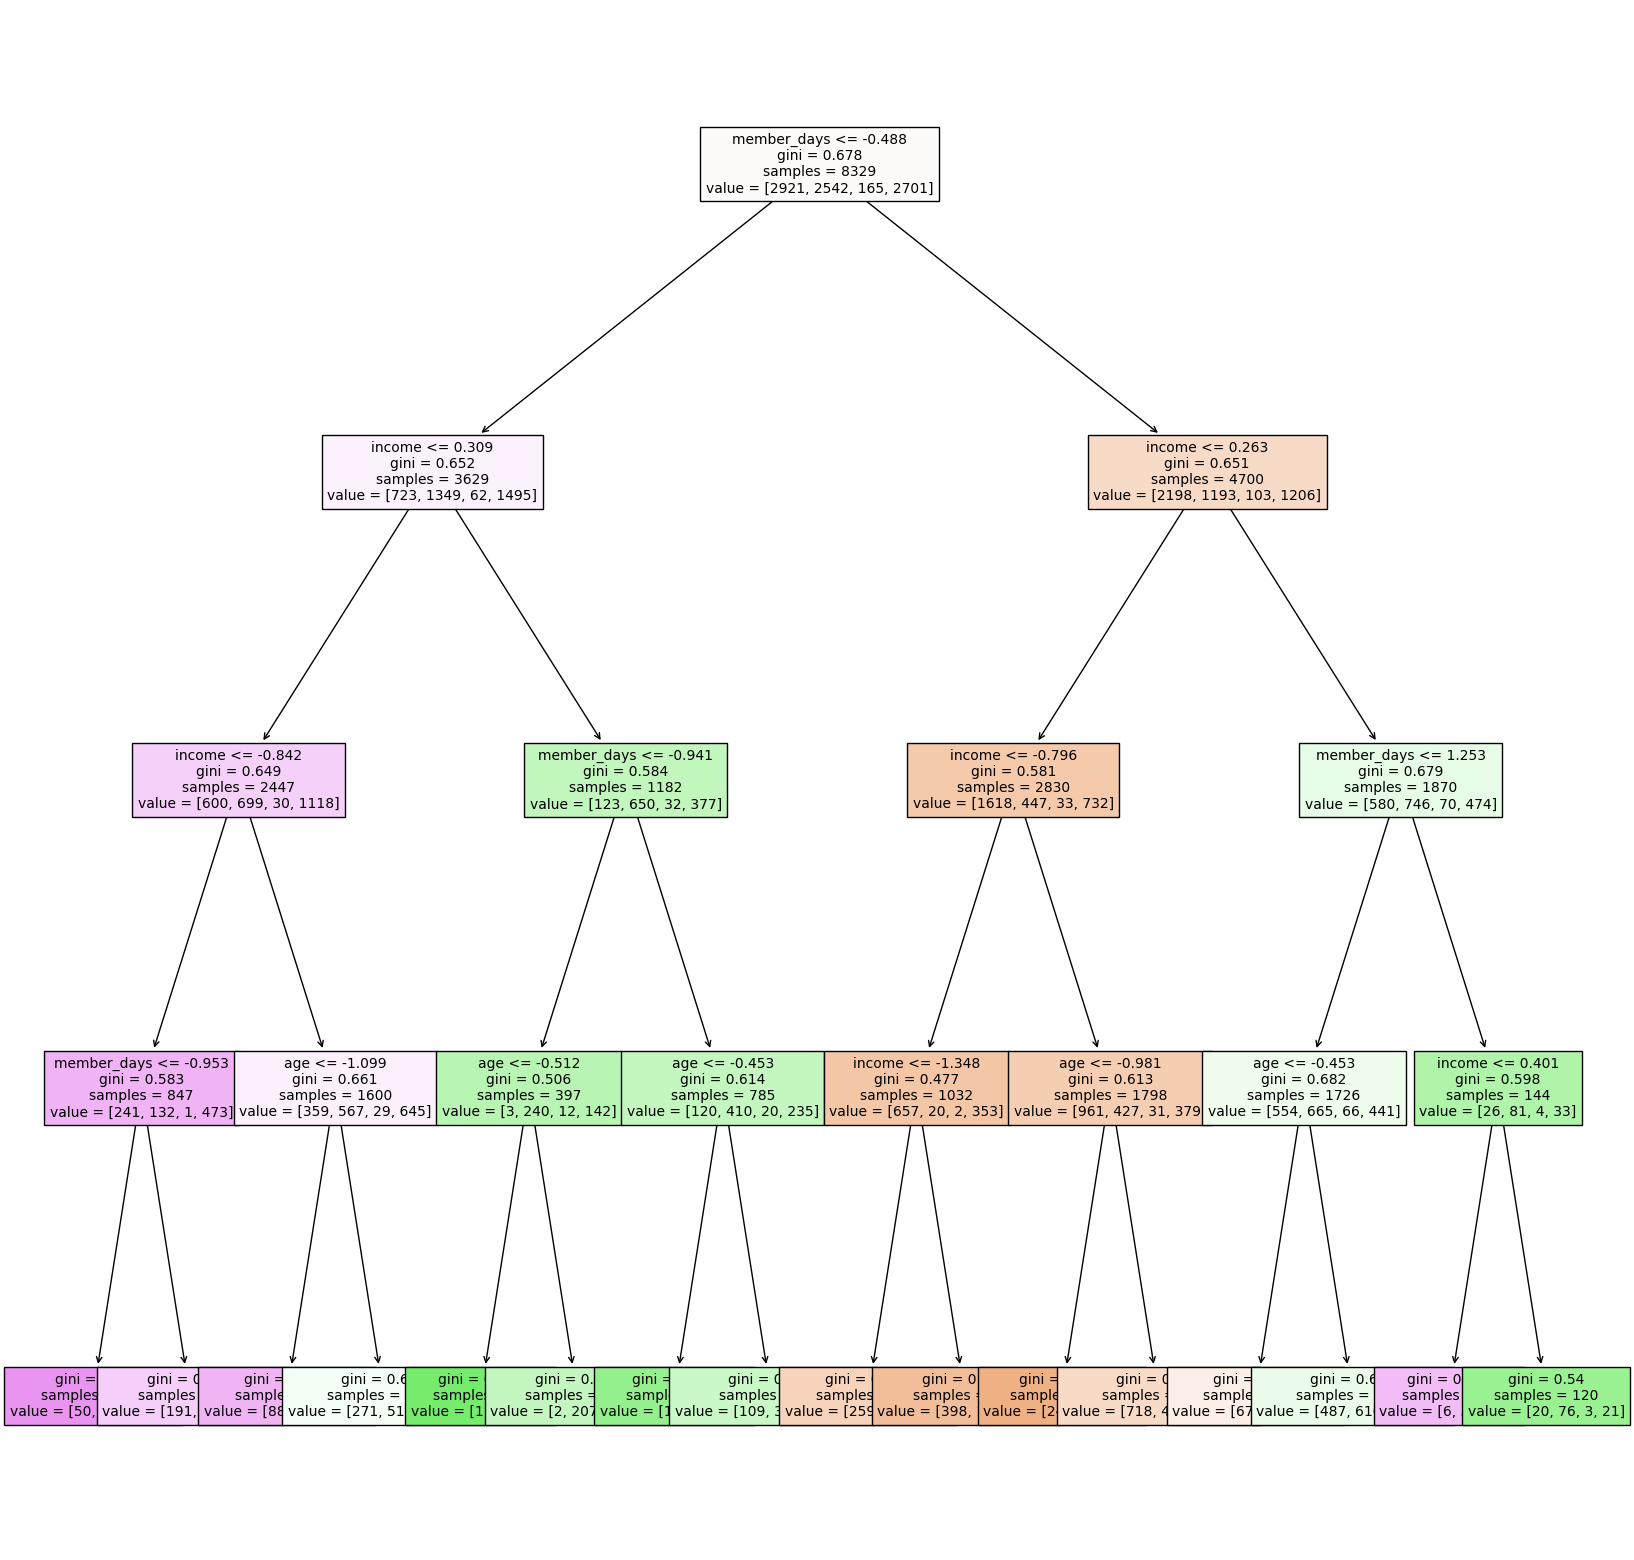

In [44]:
# Final model based on the tuned hyperparameters
ct = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=3)
model = ct.fit(X_train_std, y_train)

# Tree diagram
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
features = X.columns
tree.plot_tree(model,fontsize=10,feature_names=features, filled=True)
plt.savefig('tree.pdf')
plt.show()

In [45]:
# Feature importance
display(pd.DataFrame(list(zip(X.columns,model.feature_importances_)), columns = ['predictor','feature importance']))

# Make prediction and evaluate accuracy
y_test_pred = model.predict(X_test_std)

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_test_pred))
# accuracy: 51.1%

,predictor,feature importance
0,age,0.110674
1,income,0.500946
2,member_days,0.388380
3,gender_M,0.000000
4,gender_O,0.000000


accuracy: 0.5123249299719888


In [46]:
### Model 2: Artificial Neural Network Model, for higher accuracy
## Build ANN with one hidden layer and 5 nodes
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000, random_state=0, activation="logistic")
model2 = mlp.fit(X_train_std,y_train)

## Make prediction and evaluate accuracy
y_test_pred2 = model2.predict(X_test_std)

accuracy_score(y_test, y_test_pred2)

0.5128851540616246

In [47]:
## Varying the number of hidden layers
mlp2 = MLPClassifier(hidden_layer_sizes=(5,5),max_iter=1000, random_state=0, activation="logistic")

model3 = mlp2.fit(X_train_std,y_train)
y_test_pred3 = model3.predict(X_test_std)
accuracy_score(y_test, y_test_pred3)

0.5184873949579832

In [48]:
## Cross-validate with different size of the hidden layer
from sklearn.model_selection import cross_val_score
for i in range (2,10):
    model4 = MLPClassifier(hidden_layer_sizes=(i),max_iter=1000, random_state=0, activation="logistic")
    scores = cross_val_score(estimator=model4, X=X_std, y=y, cv=5)
    print(i,':',np.average(scores))

2 : 0.48970487564508786
3 : 0.4965964797015906
4 : 0.501050649768104
5 : 0.49626030992472653
6 : 0.502059265067944
7 : 0.5007988315124284
8 : 0.4997904281510839
9 : 0.5001267392202783


In [49]:
## ANN with optimal size of hidden layer from above
mlp3 = MLPClassifier(hidden_layer_sizes=(8),max_iter=1000, random_state=0, activation="logistic")
model5 = mlp3.fit(X_train_std,y_train)

## Make prediction and evaluate accuracy
y_test_pred5 = model5.predict(X_test_std)

accuracy_score(y_test, y_test_pred5)
# accuracy: 51.7%

0.5123249299719888